In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [3]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['score_category'] = pd.cut(df['average_score'], bins=[0, 50, 100], labels=['fail', 'pass'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,score_category
0,female,group D,some college,standard,completed,59,70,78,69.000000,pass
1,male,group D,associate's degree,standard,none,96,93,87,92.000000,pass
2,female,group D,some college,free/reduced,none,57,76,77,70.000000,pass
3,male,group B,some college,free/reduced,none,70,70,63,67.666667,pass
4,female,group D,associate's degree,standard,none,83,85,86,84.666667,pass


In [4]:
from sklearn.preprocessing import OneHotEncoder
encoder1 = OneHotEncoder()
encoder_df1 = pd.DataFrame(encoder1.fit_transform(df[['gender']]).toarray())
encoder2 = OneHotEncoder()
encoder_df2 = pd.DataFrame(encoder2.fit_transform(df[['race/ethnicity']]).toarray())
encoder3 = OneHotEncoder()
encoder_df3 = pd.DataFrame(encoder3.fit_transform(df[['parental level of education']]).toarray())
encoder4 = OneHotEncoder()
encoder_df4 = pd.DataFrame(encoder4.fit_transform(df[['lunch']]).toarray())
encoder5 = OneHotEncoder()
encoder_df5 = pd.DataFrame(encoder5.fit_transform(df[['test preparation course']]).toarray())
encoder_df1.columns = ['Gender1', 'Gender2']
encoder_df2.columns = ['race0', 'race1', 'race2', 'race3', 'race4']
encoder_df3.columns = ['Level0edu', 'Level1edu', 'Level2edu', 'Level3edu', 'Level4edu', 'Level5edu']
encoder_df4.columns = ['lunch0', 'lunch1']
encoder_df5.columns = ['tp0', 'tp1']
data = pd.concat([df[['score_category']],  
                  encoder_df3, 
                  encoder_df4, encoder_df5], axis=1)
X = data.drop('score_category', axis=1)
Y = data['score_category']

In [5]:
data.head()

,score_category,Level0edu,Level1edu,Level2edu,Level3edu,Level4edu,Level5edu,lunch0,lunch1,tp0,tp1
0,pass,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,pass,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,pass,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,pass,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,pass,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [7]:
y_predicted = []

for i in range(len(X_test)):
    parental_level_of_education = X_test.iloc[i]['Level0edu':'Level5edu'].idxmax()
    lunch = X_test.iloc[i]['lunch0':'lunch1'].idxmax()
    
    if parental_level_of_education != 'Level0edu':
        score_category = 'pass'
    elif lunch == 'lunch1':
        score_category = 'pass'
    else:
        score_category = 'fail'
        
    y_predicted.append(score_category)

print("Accuracy:", accuracy_score(y_test, y_predicted))

Accuracy: 0.865


In [8]:
y_predicted = []

for i in range(len(X_test)):
    parental_level_of_education = X_test.iloc[i]['Level0edu':'Level5edu'].idxmax()
    test_preparation_course = X_test.iloc[i]['tp0':'tp1'].idxmax()
    lunch = X_test.iloc[i]['lunch0':'lunch1'].idxmax()
    
    if parental_level_of_education > 'Level0edu':
        score_category = 'pass'
    elif lunch == 'lunch1':
        score_category = 'pass'
    elif test_preparation_course > 'tp0':
        score_category = 'pass'
    else:
        score_category = 'fail'
        
    y_predicted.append(score_category)

print("Accuracy:", accuracy_score(y_test, y_predicted))

Accuracy: 0.88


In [9]:
y_predicted = []

for i in range(len(X_test)):
    parental_level_of_education = X_test.iloc[i]['Level0edu':'Level5edu'].idxmax()
    test_preparation_course = X_test.iloc[i]['tp0':'tp1'].idxmax()
    lunch = X_test.iloc[i]['lunch0':'lunch1'].idxmax()
    
    if parental_level_of_education > 'Level0edu':
        score_category = 'pass'
    elif lunch == 'lunch0':
        score_category = 'pass'
    elif test_preparation_course < 'tp1':
        score_category = 'pass'
    else:
        score_category = 'fail'
        
    y_predicted.append(score_category)

print("Accuracy:", accuracy_score(y_test, y_predicted))

Accuracy: 0.835


In [10]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.91


Accuracy: 0.91


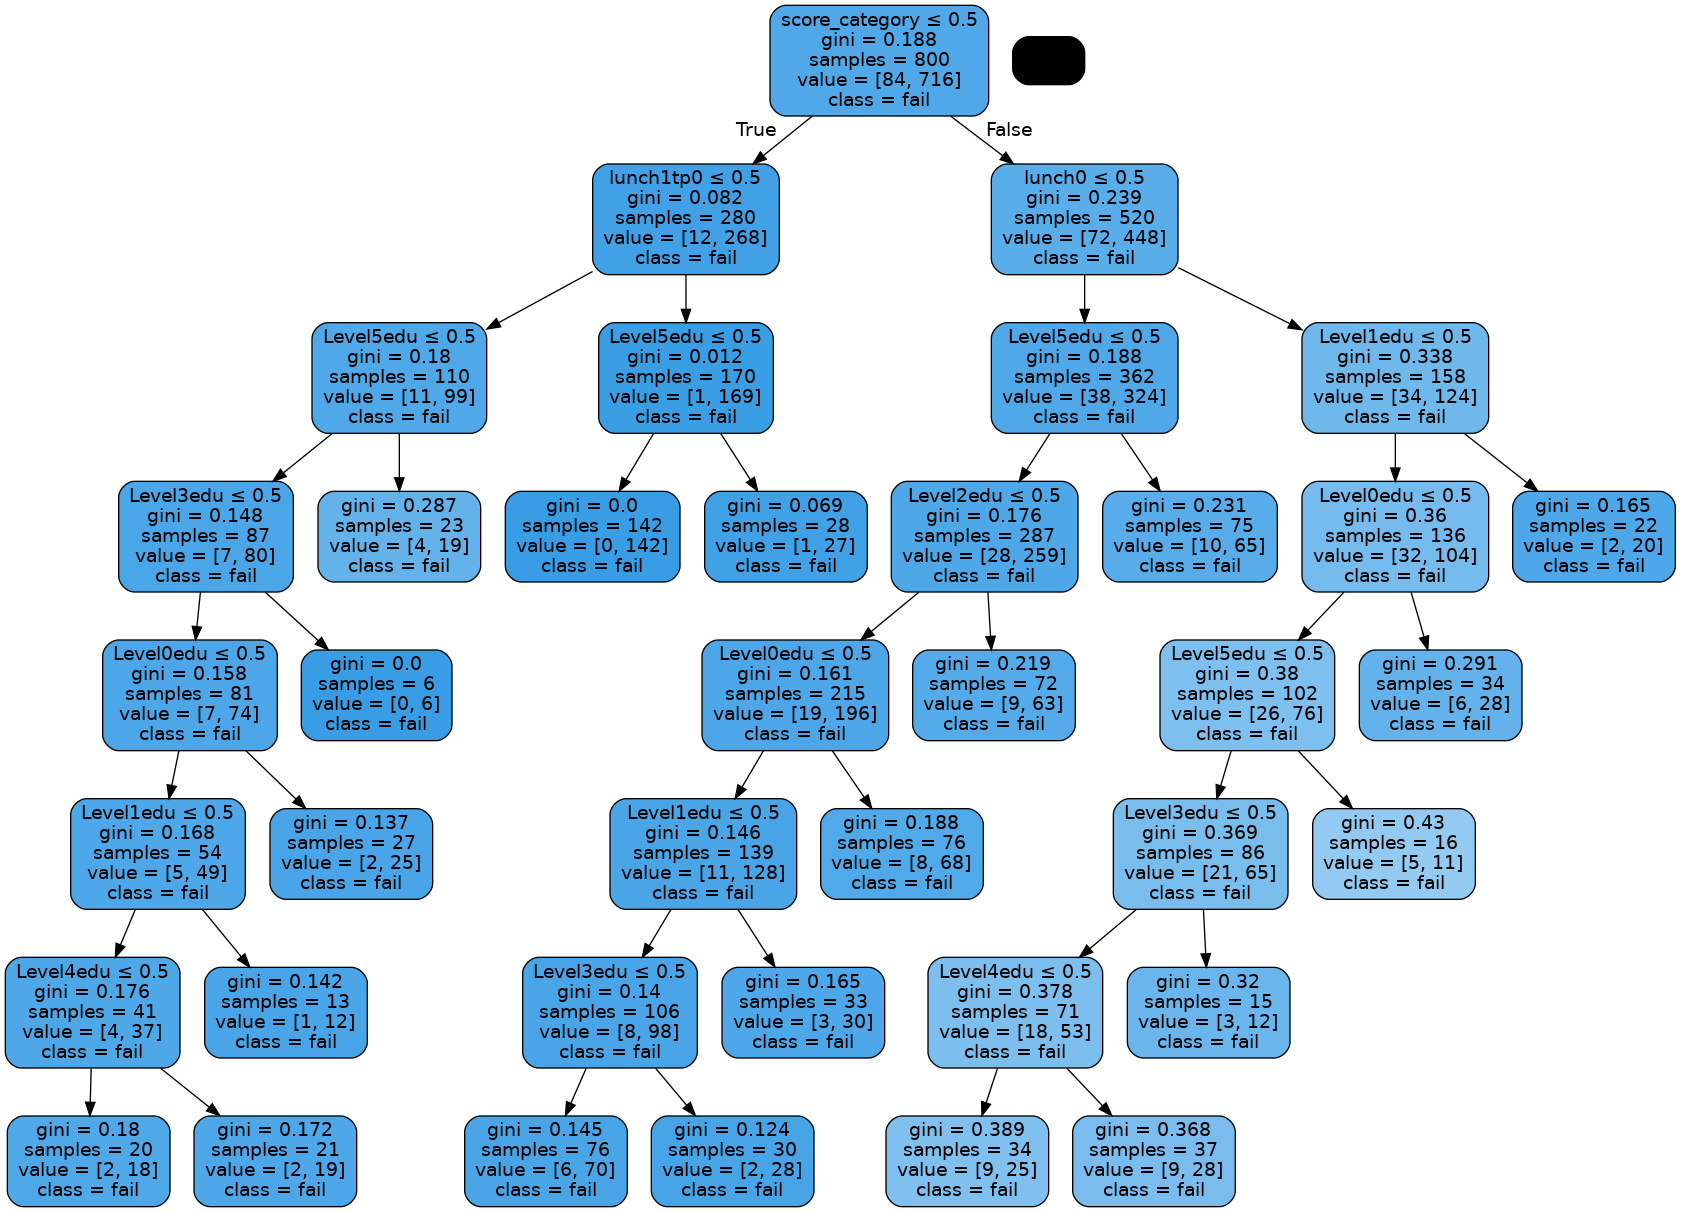

In [11]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from io import StringIO
from sklearn.tree import DecisionTreeClassifier as DTC
from pydotplus import graph_from_dot_data

dot_data = StringIO()

clf = DTC()
clf1 = clf.fit(X_train,y_train)
y_pred1 = clf1.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=['Level0edu','Level1edu','Level2edu','Level3edu', 'Level4edu', 'Level5edu','lunch0', 'lunch1' 'tp0', 'tp1', 'score_category'],
                class_names=['pass', 'fail'])

graph = graph_from_dot_data(dot_data.getvalue())
graph.write_png('c.png')
Image(graph.create_png())

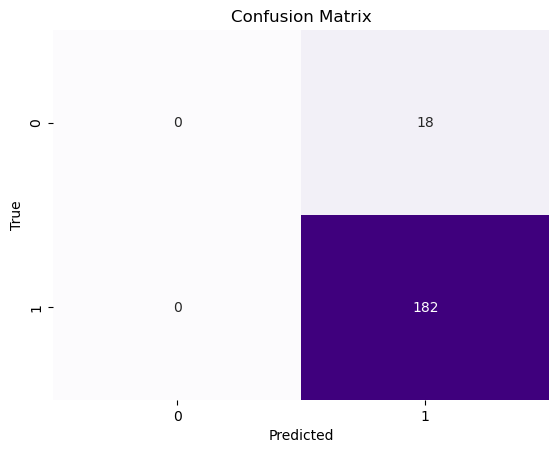

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Purples", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

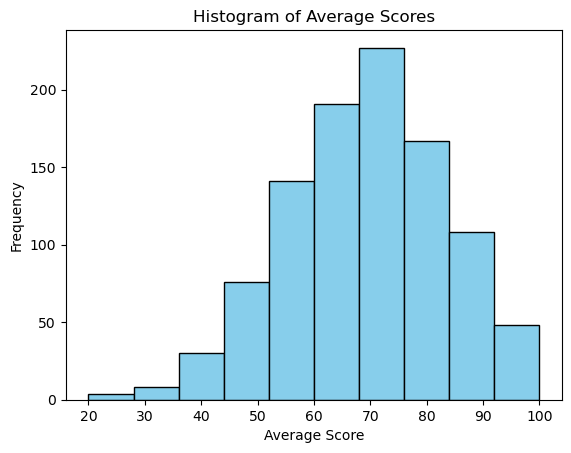

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('exams.csv')

df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

plt.hist(df['average_score'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.title('Histogram of Average Scores')

plt.show()

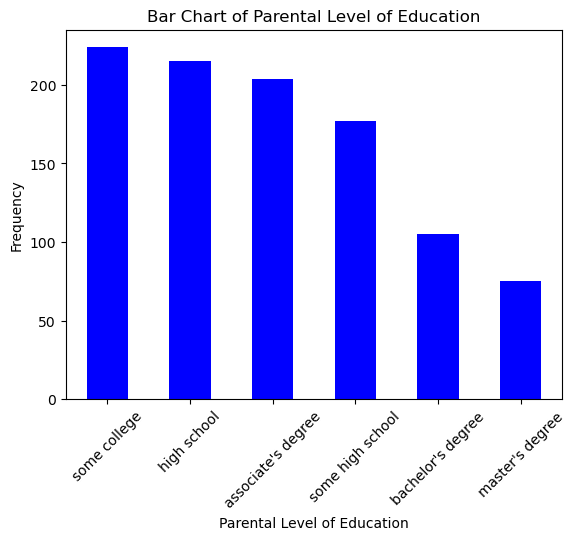

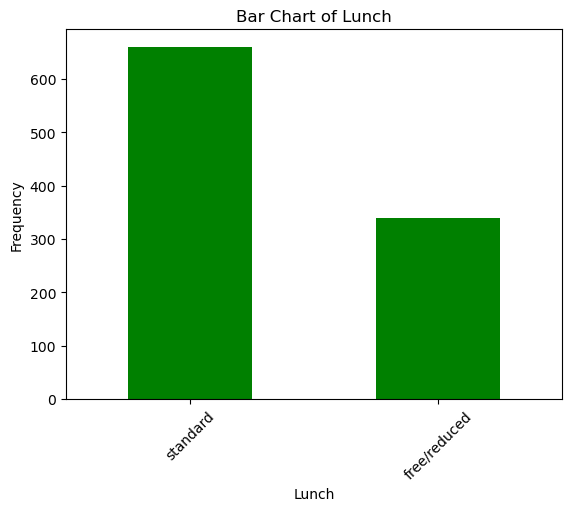

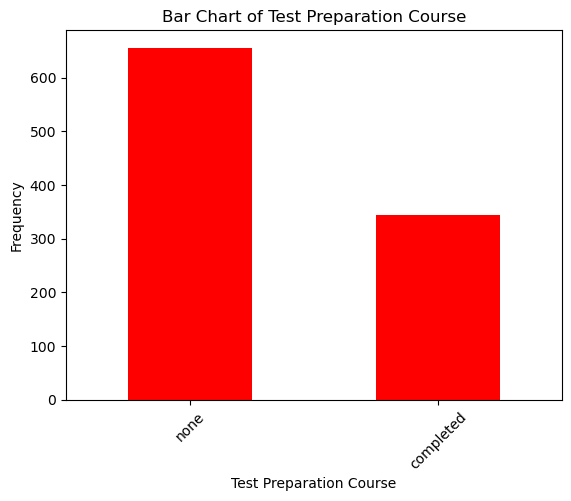

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('exams.csv')

df['parental level of education'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Parental Level of Education')
plt.ylabel('Frequency')
plt.title('Bar Chart of Parental Level of Education')
plt.xticks(rotation=45)
plt.show()

df['lunch'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Lunch')
plt.ylabel('Frequency')
plt.title('Bar Chart of Lunch')
plt.xticks(rotation=45)
plt.show()

df['test preparation course'].value_counts().plot(kind='bar', color='red')
plt.xlabel('Test Preparation Course')
plt.ylabel('Frequency')
plt.title('Bar Chart of Test Preparation Course')
plt.xticks(rotation=45)
plt.show()


In [15]:
df = pd.read_csv('exams.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=1)

df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['score_category'] = pd.cut(df['average_score'], bins=[0, 50, 100], labels=['fail', 'pass'])

from sklearn.preprocessing import OneHotEncoder
encoder1 = OneHotEncoder()
encoder_df1 = pd.DataFrame(encoder1.fit_transform(df[['gender']]).toarray())
encoder2 = OneHotEncoder()
encoder_df2 = pd.DataFrame(encoder2.fit_transform(df[['race/ethnicity']]).toarray())
encoder3 = OneHotEncoder()
encoder_df3 = pd.DataFrame(encoder3.fit_transform(df[['parental level of education']]).toarray())
encoder4 = OneHotEncoder()
encoder_df4 = pd.DataFrame(encoder4.fit_transform(df[['lunch']]).toarray())
encoder5 = OneHotEncoder()
encoder_df5 = pd.DataFrame(encoder5.fit_transform(df[['test preparation course']]).toarray())
encoder_df1.columns = ['Gender1', 'Gender2']
encoder_df2.columns = ['race0', 'race1', 'race2', 'race3', 'race4']
encoder_df3.columns = ['Level0edu', 'Level1edu', 'Level2edu', 'Level3edu', 'Level4edu', 'Level5edu']
encoder_df4.columns = ['lunch0', 'lunch1']
encoder_df5.columns = ['tp0', 'tp1']
data = pd.concat([df[['score_category']],  
                  encoder_df3, 
                  encoder_df4, encoder_df5], axis=1)
X = data.drop('score_category', axis=1)
Y = data['score_category']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.91
